In [1]:
#Load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [4]:
#Read in baseball file
dodgers = pd.read_csv("dodgers.csv")
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [6]:
#Describe. Only looks at numeric values, but gives count, mean, standard deviation, and min/max
dodgers.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [8]:
#Check for any null values
dodgers.isnull().sum()

#No null values found

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [10]:
#Check for missing values
for c in dodgers.columns:
    miss = dodgers[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))
        
#No values are found missing

month has no missing values
day has no missing values
attend has no missing values
day_of_week has no missing values
opponent has no missing values
temp has no missing values
skies has no missing values
day_night has no missing values
cap has no missing values
shirt has no missing values
fireworks has no missing values
bobblehead has no missing values


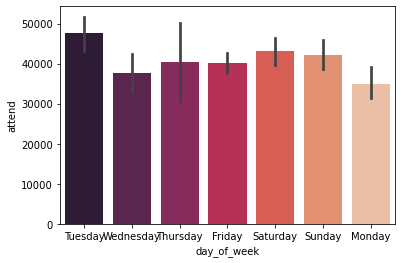

In [21]:
#Bar plot of day of week by attendance
sns.barplot(x = 'day_of_week', y = 'attend', data = dodgers, palette = 'rocket')

```
Tuesday has the highest attendance, while Monday and Wednesday are noticeably lower than the other days of the week. This doesn't follow my assumptions because I would assume weekend games would have a higher attendance since more people are out of work. 
```

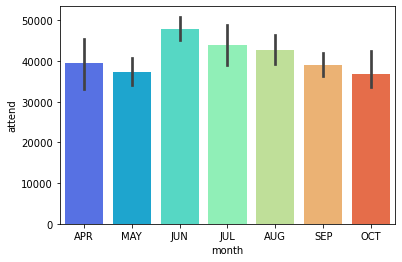

In [23]:
#Barplot of month by attendance.
sns.barplot(x = 'month', y = 'attend', data = dodgers, palette = 'rainbow') 

```
June shows to have the best turn out of the months, while October and May seem to have the least amount of attendance. October you start getting into play offs and the world series so not all teams are playing, which could play a factor. 
```

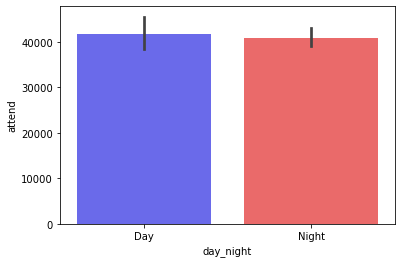

In [25]:
#Barplot of attendance by day or night
sns.barplot(x = 'day_night', y = 'attend', data = dodgers, palette = 'seismic')

```
Day looks to be a little higher than night games. However, I don't think this will play a major factor in my predictions later on.
```

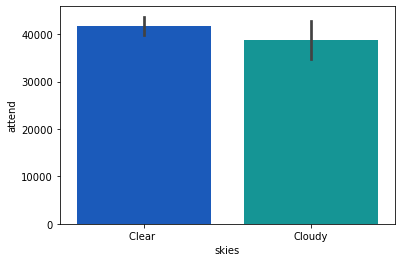

In [26]:
#Barplot of attendance by sky
sns.barplot(x = 'skies', y = 'attend', data = dodgers, palette = 'winter')

```
On this bar graph it looks like clear skies is slightly higher than cloudy skies. However, I think the numbers are similar enough that this won't play a major facotr in my predictions later on.
```

In [13]:
#I think it'll be easier to work with the promotions if I change the Yes and No to 1 and 0.
dodgers['cap'] = dodgers['cap'].map({'NO': 0, 'YES': 1})
dodgers['shirt'] = dodgers['shirt'].map({'NO': 0, 'YES': 1})
dodgers['fireworks'] = dodgers['fireworks'].map({'NO': 0, 'YES': 1})
dodgers['bobblehead'] = dodgers['bobblehead'].map({'NO': 0, 'YES': 1})
dodgers

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,0,0,0,0
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,0,0,0,0
78,OCT,1,33624,Monday,Giants,86,Clear,Night,0,0,0,0
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,0,0,0,0


In [14]:
dodgers['cap'].value_counts()

0    79
1     2
Name: cap, dtype: int64

In [15]:
dodgers['shirt'].value_counts()

0    78
1     3
Name: shirt, dtype: int64

In [16]:
dodgers['fireworks'].value_counts()

0    67
1    14
Name: fireworks, dtype: int64

In [17]:
dodgers['bobblehead'].value_counts()

0    70
1    11
Name: bobblehead, dtype: int64

```
Looking at the promotions, it doesn't look like cap or shirt promotions are used very often. With this in mind attendance could be higher for those days since they are not as frequent. Fireworks and bobblehead happen more often, so I do want to look at attendance for those specific days as well since they might be more popular than shirt or cap.
```

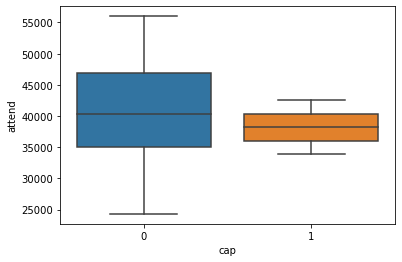

In [21]:
#Boxplot looking at attendance when cap promotion runs
sns.boxplot(y = 'attend', x = 'cap', data = dodgers)

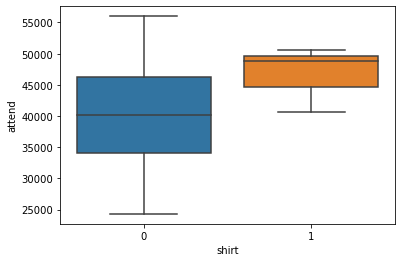

In [20]:
#Boxplot looking at attendance when shirt promotion runs
sns.boxplot(y = 'attend', x = 'shirt', data = dodgers)

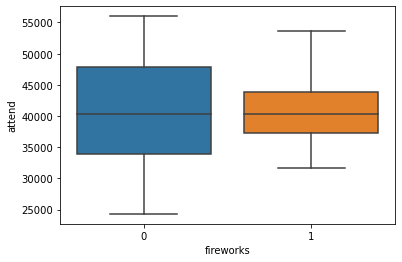

In [22]:
#Boxplot looking at attendance when fireworks promotion is run
sns.boxplot(y = 'attend', x = 'fireworks', data = dodgers)

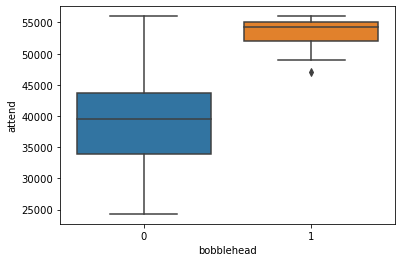

In [23]:
#Boxplot looking at when bobblehead promotion is run
sns.boxplot(y = 'attend', x = 'bobblehead', data = dodgers)

```
Of the boxplots looking at attendance on nights promotions happen I would say that the most popular nights are when shirts and bobbleheads are given out. I think this could have an overall factor on nights of most popular attendance and is something I should consider when I make my final prediction.
```

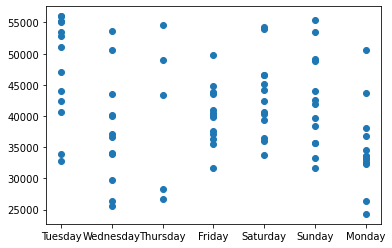

In [27]:
#Just wanted to see scatter of attendance by day of the week to see how some of the points graphed
x = dodgers.day_of_week
y = dodgers.attend
plt.scatter(x,y)
plt.show()

```
Just looking at some of the highest points on days of the week I can actually see Friday also has a low attendance like Monday. Tuesday still shows the highest with a heavier concentration towards the peak attendance numbers, but Saturday and Sunday also have some concentration towards the top. If I'm looking at the visuals alone I would say the best time to go to a game would be 
```

In [36]:
#Grouping day of the week and bobblehead promotion attendance
dodgers.groupby(by = ['day_of_week', 'bobblehead'])['attend'].mean()

day_of_week  bobblehead
Friday       0             40116.923077
Monday       0             34965.666667
Saturday     0             41062.909091
             1             54128.000000
Sunday       0             41178.000000
             1             55359.000000
Thursday     0             32803.333333
             1             51813.500000
Tuesday      0             43326.714286
             1             52891.500000
Wednesday    0             37585.166667
Name: attend, dtype: float64

In [37]:
#Grouping day of the week and shirt promotion attendance
dodgers.groupby(by = ['day_of_week', 'shirt'])['attend'].mean()

day_of_week  shirt
Friday       0        40116.923077
Monday       0        33548.090909
             1        50559.000000
Saturday     0        43072.923077
Sunday       0        41728.500000
             1        48753.000000
Thursday     0        40407.400000
Tuesday      0        48334.750000
             1        40619.000000
Wednesday    0        37585.166667
Name: attend, dtype: float64

In [38]:
#Grouping day of the week and cap promotion attendance
dodgers.groupby(by = ['day_of_week', 'cap'])['attend'].mean()

day_of_week  cap
Friday       0      40116.923077
Monday       0      34965.666667
Saturday     0      43072.923077
Sunday       0      42250.000000
             1      42495.000000
Thursday     0      40407.400000
Tuesday      0      48896.000000
             1      33884.000000
Wednesday    0      37585.166667
Name: attend, dtype: float64

In [39]:
#Grouping day of the week and fireworks promotion attendance
dodgers.groupby(by = ['day_of_week', 'fireworks'])['attend'].mean()

day_of_week  fireworks
Friday       1            40116.923077
Monday       0            34965.666667
Saturday     0            43072.923077
Sunday       0            42268.846154
Thursday     0            40407.400000
Tuesday      0            47741.230769
Wednesday    0            36132.000000
             1            53570.000000
Name: attend, dtype: float64

In [40]:
#Grouping month and bobblehead promotion attendance
dodgers.groupby(by = ['month', 'bobblehead'])['attend'].mean()

month  bobblehead
APR    0             38260.090909
       1             54242.000000
AUG    0             39635.666667
       1             55215.000000
JUL    0             40489.555556
       1             54068.333333
JUN    0             46739.857143
       1             52142.500000
MAY    0             35875.562500
       1             49107.000000
OCT    0             36703.666667
SEP    0             38955.083333
Name: attend, dtype: float64

In [41]:
#Grouping month and shirt promotion attendance
dodgers.groupby(by = ['month', 'shirt'])['attend'].mean()

month  shirt
APR    0        38759.090909
       1        48753.000000
AUG    0        42751.533333
JUL    0        43884.250000
JUN    0        47613.125000
       1        50559.000000
MAY    0        37345.722222
OCT    0        36703.666667
SEP    0        38803.818182
       1        40619.000000
Name: attend, dtype: float64

In [42]:
#Grouping month and cap promotion attendance
dodgers.groupby(by = ['month', 'cap'])['attend'].mean()

month  cap
APR    0      39591.916667
AUG    0      42769.857143
       1      42495.000000
JUL    0      44793.363636
       1      33884.000000
JUN    0      47940.444444
MAY    0      37345.722222
OCT    0      36703.666667
SEP    0      38955.083333
Name: attend, dtype: float64

In [43]:
#Grouping month and fireworks promotion attendance
dodgers.groupby(by = ['month', 'fireworks'])['attend'].mean()

month  fireworks
APR    0            39869.500000
       1            38204.000000
AUG    0            43359.083333
       1            40321.333333
JUL    0            42916.800000
       1            48721.500000
JUN    0            48752.714286
       1            45097.500000
MAY    0            37296.200000
       1            37593.333333
OCT    0            36703.666667
SEP    0            39016.100000
       1            38650.000000
Name: attend, dtype: float64